# MNIST classification using a SGD classifier and Scikit-Learn functions

### A few packages to get you going
* We'll be loading many more throughout the tutorial
* Download the dataset by executing the proceeding cells

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

* Print dictionary keys

In [3]:
for key in mnist.keys():
    print(key)

data
target
frame
categories
feature_names
target_names
DESCR
details
url


* Save the contents of the data and target from the MNIST dictionary into data_array and target array variables
    * Also print out the shape of data_array
* Notice the type of the target array – convert this to np.uint8 using the astype() method

In [4]:
data_array=np.array(mnist.data)
data_array.shape

(70000, 784)

In [5]:
target_array=np.array(mnist.target)
target_array.shape
type(target_array[0])

str

In [6]:
target_array = target_array.astype(np.uint8)
type(target_array[0])
target_array.shape

(70000,)

* Print and glance over the description given in the mnist dictionary
* Plot an image of the very first image in the dataset (matplotlib imshow)

* Bonus ACTIVITY: Write a function that takes in the index of a sample and plots it


In [7]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

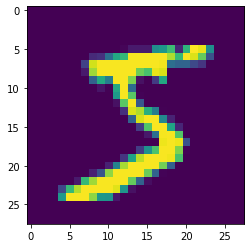

In [8]:
plt.imshow(data_array[0].reshape(28,28))

In [9]:
import random
def mnist_plot(index):
    plt.imshow(data_array[index].reshape(28,28))    

None


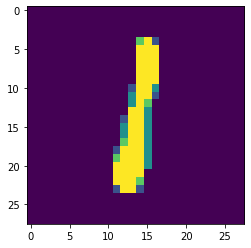

In [10]:
index = random.randint(1, 70000)
print(mnist_plot(index))

### train_test_split
* turn off shuffle

In [11]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test  = train_test_split(data_array, target_array, shuffle=False)

In [12]:
print(data_train.shape, target_train.shape, data_test.shape,target_test.shape)

(52500, 784) (52500,) (17500, 784) (17500,)


### Make a new target array (for only train dataset) that is composed of Boolean values (True for 5s and False for not 5s)
* Name the new array target_array_train_5


In [13]:
target_array_train_5 = target_train == 5
print(target_train[0:10])
print(target_array_train_5[0:10])

[5 0 4 1 9 2 1 3 1 4]
[ True False False False False False False False False False]


### SGDClassifier
* Name it sgd_clf
* Fit the model to the data with the fives target
* Check to see if it worked using the predict function on a specific sample you know is a 5; also a sample you know is not a 5
    * Individual predictions will require a reshape (necessary command will appear in error)


In [14]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)

In [15]:
sgd_clf.fit(data_train, target_array_train_5)

SGDClassifier(max_iter=500)

In [16]:
print(target_train[0:10])
print(sgd_clf.predict(data_train[0:10]))
sgd_clf.predict(data_train[0].reshape(1,-1))

[5 0 4 1 9 2 1 3 1 4]
[ True False False False False False False False False False]


array([ True])

### StandardScaler

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_train)

StandardScaler()

In [18]:
data_train_scale = scaler.transform(data_train)
data_test_scale = scaler.transform(data_test)

In [19]:
sgd_clf.fit(data_train_scale, target_array_train_5)

/Users/susann/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=500)

In [20]:
print(target_train[0:10])
print(sgd_clf.predict(data_train_scale[0:10]))

[5 0 4 1 9 2 1 3 1 4]
[False False False False False False False False False False]


### cross_val_score
* Implement it using 3-fold cross validation, scoring for accuracy


In [21]:
#measure performance
from sklearn.model_selection import cross_val_score

In [22]:
print(cross_val_score(sgd_clf, data_train, target_array_train_5, scoring='accuracy', cv=3))

[0.95074286 0.95182857 0.96691429]


### Calculate the accuracy if the model always predicted not-5


In [23]:
np.count_nonzero(target_train == 5)

4739

In [24]:
per_true = sum((target_array_train_5)==True)

In [25]:
len(target_train)
acc_false=(len(target_train)-per_true)/len(target_train)
print(acc_false)

0.9097333333333333


### cross_val_predict 
* Name the array of predictions target_array_train_5_pred

In [26]:
from sklearn.model_selection import cross_val_predict

In [27]:
target_array_train_5_pred = cross_val_predict(sgd_clf, data_train,target_array_train_5, cv=3)

In [28]:
print(target_array_train_5_pred[0:20])

[ True False False False False False False False False False False  True
 False False False False False False False False]


### precision_score; recall_score

In [29]:
from sklearn.metrics import precision_score

In [30]:
precision_score(target_array_train_5, target_array_train_5_pred)

0.8015768725361366

In [31]:
from sklearn.metrics import recall_score

In [32]:
recall_score(target_array_train_5, target_array_train_5_pred,average='binary')

0.7723148343532391

In [33]:
from sklearn.metrics import precision_recall_fscore_support

In [34]:
precision_recall_fscore_support(target_array_train_5, target_array_train_5_pred, average='binary')

(0.8015768725361366, 0.7723148343532391, 0.786673831273509, None)

### roc_curve
* Run cross_val_predict as before, but add method='decision_function'
* Use matplotlib plot to create ROC curve figure

In [35]:
from sklearn import metrics

In [36]:
pred_score = cross_val_predict(sgd_clf, data_train, target_array_train_5, cv=3, method='decision_function')
print(pred_score[0:20])

[  5348.9745209  -28525.24123623 -30273.45162427 -11439.89041721
 -27762.53454435  -7323.70790258 -15495.602307   -24987.97787058
  -7335.02520865  -5144.98365706 -21019.39300239  17975.50403724
 -33879.91352449  -7073.8393761   -7200.28412054 -18829.69875873
 -13772.77211324 -11849.83912456  -6388.95226453 -22258.1293852 ]


In [37]:
fpr, tpr, thresholds = metrics.roc_curve(target_array_train_5, pred_score)
print(fpr, tpr, thresholds)

[0.         0.         0.         ... 0.99778062 0.99778062 1.        ] [0.00000000e+00 2.11014982e-04 2.74319477e-03 ... 9.99788985e-01
 1.00000000e+00 1.00000000e+00] [  45017.76113573   45016.76113573   35876.4879873  ...  -96342.57868634
  -96908.3902496  -162779.10359829]


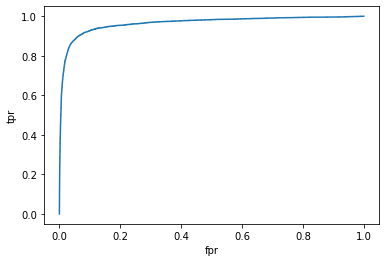

In [38]:
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

### roc_auc_score

In [39]:
from sklearn.metrics import roc_auc_score

In [40]:
roc_auc_score(target_array_train_5, pred_score)

0.9647391141777408

### Find the cross_val_pred for the SGD classifier using all 10 classes (change targets)
* Use a new variable target_array_train_pred to save predictions 

In [41]:
sgd_clf.fit(data_train, target_train)

SGDClassifier(max_iter=500)

In [53]:
print(target_train[0:10])
print(sgd_clf.predict(data_train[0:10]))
sgd_clf.predict(data_train[0].reshape(1,-1))

[5 0 4 1 9 2 1 3 1 4]
[3 0 4 1 4 2 1 3 1 4]


array([3], dtype=uint8)

In [45]:
#cross_val_score
print(cross_val_score(sgd_clf, data_train, target_train, scoring='accuracy', cv=3))

[0.87514286 0.85702857 0.87611429]


In [47]:
#cross_val_predict
target_array_train_pred = cross_val_predict(sgd_clf, data_train,target_train, cv=3)

In [54]:
print(target_train[0:20])
print(target_array_train_pred[0:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [59]:
#precision score, recall score
print(precision_score(target_train, target_array_train_pred, average='weighted'))
print(recall_score(target_train, target_array_train_pred, average='weighted'))

0.8745773020048216
0.871447619047619


In [60]:
precision_recall_fscore_support(target_train, target_array_train_pred, average='weighted')

(0.8745773020048216, 0.871447619047619, 0.8711343683528182, None)

In [61]:
#roc_curve
pred_score_10cl = cross_val_predict(sgd_clf, data_train, target_train, cv=3, method='decision_function')
print(pred_score_10cl[0:20])

[[-26098.25985535 -68173.74017805 -23361.82095287    390.92431319
  -43105.66302504  10424.03511657 -49752.56777763 -27005.69737288
  -14634.7881382  -28763.88027927]
 [ 38405.73104628 -50899.85713742 -20886.40441062 -17846.98823983
  -34963.62847844 -35759.8133041  -26460.04735714 -38858.67768663
  -12296.41892789 -26795.37402072]
 [-48950.36832162 -62174.54551826 -16726.47196283    356.68291977
     925.06475233 -50563.78682358 -63059.78016458 -31072.55616329
  -33153.27319174 -24853.41527615]
 [-38395.8807486   18411.84398387  -8712.12190275  -6081.37974262
  -12122.92990822 -20644.21663683 -25073.88206484 -22243.43165938
   -2453.44917449 -17522.2760566 ]
 [-60651.18880096 -41474.25346602 -41056.61180188 -24225.31059881
  -10957.66544667 -23782.92009083 -39428.22748252 -22169.68849811
  -10727.5459826    1114.81050574]
 [-19600.59883308 -64232.34497737   6601.18368212 -17904.87370428
  -33125.75010419 -19550.43097378 -42606.8446598  -39186.89302671
   -4597.6349949  -18045.87986406

In [43]:
# with scaled data
sgd_clf.fit(data_train_scale, target_train)

/Users/susann/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=500)

In [46]:
print(target_train[0:10])
print(sgd_clf.predict(data_train_scale[0:10]))

[5 0 4 1 9 2 1 3 1 4]
[3 0 4 1 9 2 1 3 1 4]


In [62]:
#cross_val_score
print(cross_val_score(sgd_clf, data_train_scale, target_train, scoring='accuracy', cv=3))

/Users/susann/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/susann/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[0.90428571 0.90811429 0.90554286]


/Users/susann/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [64]:
#cross_val_predict
target_array_train_scale_pred = cross_val_predict(sgd_clf, data_train_scale,target_train, cv=3)

/Users/susann/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/susann/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/susann/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [65]:
print(target_train[0:20])
print(target_array_train_scale_pred[0:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
[3 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [66]:
#precision score, recall score
print(precision_score(target_train, target_array_train_scale_pred, average='weighted'))
print(recall_score(target_train, target_array_train_scale_pred, average='weighted'))

0.9094687798794887
0.9068571428571428


### confusion_matrix

In [67]:
from sklearn.metrics import confusion_matrix

In [78]:
con_matrix = confusion_matrix(target_train, target_array_train_scale_pred)
print(con_matrix)

[[4920    1   26    6    8   57   39    5  118    4]
 [   1 5664   44   26    5   45    3    8  139   13]
 [  26   30 4655   85   62   28   64   39  203   11]
 [  23   21  129 4634    2  210   22   46  192   72]
 [  11   11   48    9 4603   10   38   20  154  185]
 [  31   18   42  151   47 4026   73   17  256   78]
 [  25   17   45    2   43   90 4904    7   71    0]
 [  14   13   63   35   46   11    4 4970   60  233]
 [  23   67   55  100    5  120   31   10 4637   56]
 [  22   19   29   68  124   37    2  160  171 4597]]


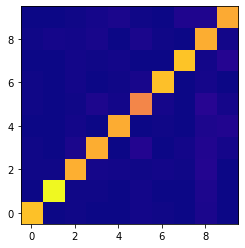

In [90]:
plt.imshow(con_matrix, cmap='plasma', origin='lower')